# 課題1 ホフメラー図

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 4次Runge-Kutta法

In [2]:
def RungeKutta4(initial, time, model, F):
    """
    F :
        Forcing constant, to be used in Lorenz96
    kwargs : 
        modelに渡す x 以外の変数を指定
    """
    dt = time[1] - time[0]
    states = [initial]
    x = initial
    for t in time[:-1]:
        k1 = model(x, F)
        x1 = x + k1 * dt/2
        k2 = model(x1, F)
        x2 = x + k2 * dt/2
        k3 = model(x2, F)
        x3 = x + k3 * dt
        k4 = model(x3, F)
        x = x + (k1 + 2*k2 + 2*k3 + k4) * dt / 6
        states.append(x)
    states = np.stack(states)
    return states

# Lorenz-96

In [4]:
def Lorenz96(x0, F):
    x = np.zeros(x0.shape[0]+3)
    # 周期的なxの表現をつくる
    x[2:-1] = x0 # index 2がもとのxのindex 0, index -2がもとのxのN
    x[:2] = x0[-2:] # index 0,1 がもとのxのindex N-1, N
    x[-1] = x0[0] # index -1 がもとのxのindex 0
    
    dxdt = (x[3:] - x[:-3]) * x[1:-2] - x[2:-1] + F
    return dxdt

def L96(x, F, N=40):
    """
    Lorenz 96 model with constant forcing.
    Cited by "https://en.wikipedia.org/wiki/Lorenz_96_model"
    
    Parameters
    ----------
    x : 
        variables
    F :
       Forcing constant 
    N : int
        number of sites
    """
    # Setting up vector
    d = np.zeros(N)
    # Loops over indices (with operations and Python underflow indexing handling edge cases)
    for i in range(N):
        d[i] = (x[(i + 1) % N] - x[i - 2]) * x[i - 1] - x[i] + F
    return d

In [69]:
N = 40
F = 8.0
time = np.arange(0.0, 50.0, 0.05)

In [70]:
# 初期値をわずかに変えたもの
x1 = np.full(N, F)
x1[19] += F * 0.001
xs1 = RungeKutta4(x1, time, Lorenz96, F=F)

# ホフメラー図のプロット

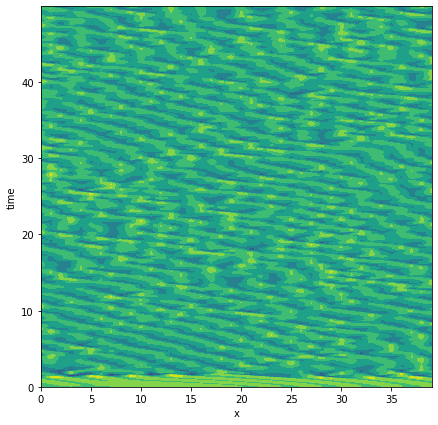

In [72]:
n = np.arange(0, N, 1)
gx, gt = np.meshgrid(n, time) #メッシュの生成

fig = plt.figure(figsize= (7, 7))
ax = fig.add_subplot(111)
ax.contourf(gx, gt, xs1) #等高線プロット
ax.set_xlabel("x")
ax.set_ylabel("time")
plt.show()